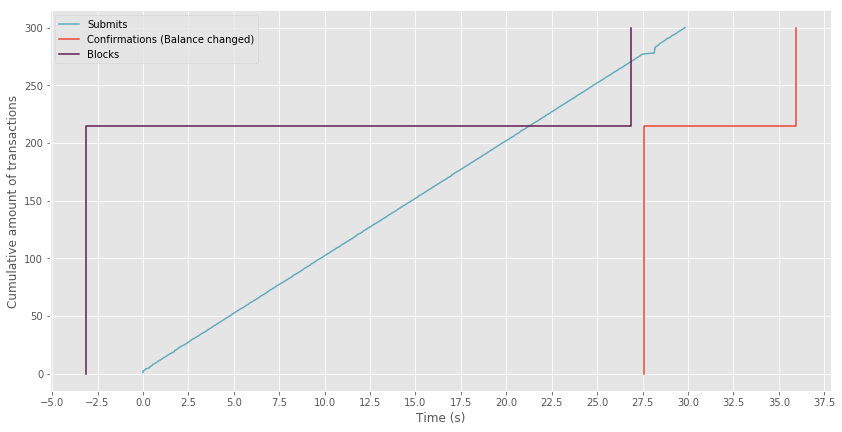

In [7]:
import os
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,7)

trial_path = '../results/ethereum/baseload_0/sub10/sub10_dur30_base0_1621845983925/'

submits = pd.read_json(path_or_buf=trial_path + 'submits.json', convert_dates=False)
start_time = submits['timestamp'].values[0]
submits['timestamp'] = (submits['timestamp'] - start_time) / 1000
submits = submits.drop(columns = ['txHash'])
submits = submits.set_index('index')

balance_change = pd.read_json(path_or_buf=trial_path + 'balanceChanges.json', convert_dates=False)
balance_change['timestamp'] = (balance_change['timestamp'] - start_time) / 1000
balance_change.loc[-1] = [0, balance_change['timestamp'].values[0]]
balance_change.shift(1)
balance_change.sort_index(inplace=True) 
balance_change = balance_change.set_index('amount')

blocks = pd.read_json(trial_path + 'blocks.json', convert_dates=False)
blocks['timestamp'] = blocks['timestamp'] - start_time / 1000
blocks.loc[-1] = [0, blocks['timestamp'].values[0]]
blocks.shift(1)
blocks.sort_index(inplace=True)
blocks = blocks.set_index('amountTx')


fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot(submits['timestamp'], submits.index, label = 'Submits', color='#63ACBE')
ax.step(balance_change['timestamp'], balance_change.index, label = 'Confirmations (Balance changed)', where='post', color='#EE442F')
ax.step(blocks, blocks.index, label = 'Blocks', where='post', color='#601A4A')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Cumulative amount of transactions')
ax.xaxis.set_major_locator(MaxNLocator(20))

plt.legend()
plt.show()